In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelpdata/yelpHotelData.db
/kaggle/input/yelpdata/yelpResData.db


In [31]:
import pandas as pd
import sqlite3

In [32]:
# Read sqlite query results into a pandas DataFrame
#con_hotel = sqlite3.connect("/kaggle/input/yelpdata/yelpHotelData.db")
#df_hotel = pd.read_sql_query("SELECT * from review", con_hotel)
# Verify that result of SQL query is stored in the dataframe
#df_hotel.head()

In [33]:
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [35]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('/kaggle/input/yelpdata/yelpHotelData.db')
x1 = connection.execute("select * FROM review")
res = connection.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(res)
for name in res:
    print(name)

('review',)
('sqlite_stat1',)
('sqlite_stat2',)
('reviewer',)
('hotel',)


In [36]:
description = []
Class = []

data = x1.fetchmany(688329)

for x in data:
  description.append(x[3])
  Class.append(x[8])
trainData = {'Class' : Class, 'Description' : description}
df_X = pd.DataFrame(trainData)

In [37]:

df_X.loc[df_X['Class'] == "NR", 'Class'] = "N"
df_X.loc[df_X['Class'] == "YR", 'Class'] = "Y"
df_X['Class'].value_counts()

N    420785
Y    267544
Name: Class, dtype: int64

In [38]:
df_X['Class'] = df_X['Class'].apply(lambda x:1 if x=='Y' else 0)

In [39]:
texts = df_X['Description'].values
labels = df_X['Class'].values

In [40]:
from keras.utils import to_categorical

In [41]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 322447 unique tokens.
Shape of data tensor: (688329, 100)
Shape of label tensor: (688329,)


In [42]:
labels=np.asarray(labels)

In [43]:

VALIDATION_SPLIT=0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


In [44]:

training_samples = 48000
test_samples = 12000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]
print(" x_train",x_train.shape)
print(" y_train",y_train.shape)

 x_train (48000, 100)
 y_train (48000,)


In [45]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop
     

max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [46]:
%%time
history = model.fit(x_train, y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
300/300 [==============================] - 71s 226ms/step - loss: 0.6549 - acc: 0.6165 - val_loss: 0.6231 - val_acc: 0.6430
Epoch 2/5
300/300 [==============================] - 64s 215ms/step - loss: 0.6236 - acc: 0.6467 - val_loss: 0.6186 - val_acc: 0.6474
Epoch 3/5
300/300 [==============================] - 64s 214ms/step - loss: 0.6144 - acc: 0.6548 - val_loss: 0.6173 - val_acc: 0.6506
Epoch 4/5
300/300 [==============================] - 64s 212ms/step - loss: 0.6091 - acc: 0.6609 - val_loss: 0.6205 - val_acc: 0.6438
Epoch 5/5
300/300 [==============================] - 63s 209ms/step - loss: 0.6047 - acc: 0.6664 - val_loss: 0.6166 - val_acc: 0.6518
CPU times: user 6min 32s, sys: 22.9 s, total: 6min 55s
Wall time: 5min 26s


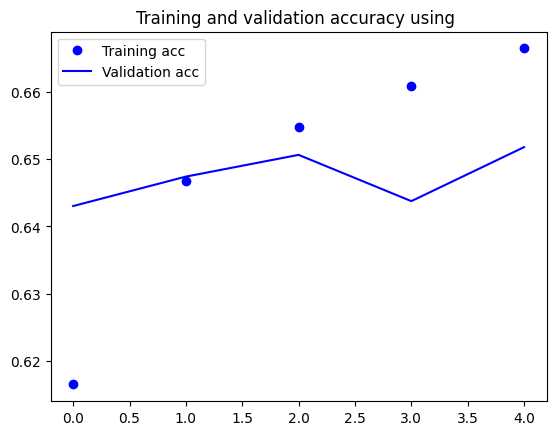

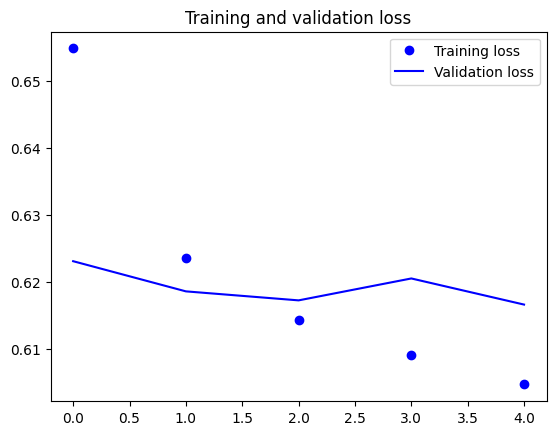

In [47]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using ')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
model.evaluate(x_test, y_test)

375/375 [==============================] - 12s 31ms/step - loss: 0.6253 - acc: 0.6398


[0.6252628564834595, 0.6398333311080933]

In [49]:

model.save("gdata/lstm.h5")
model.metrics_names

['loss', 'acc']

In [50]:
model_conv = Sequential()
model_conv.add(Embedding(max_words, 128, input_length=maxlen))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(LSTM(128))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 64)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                      

In [51]:

history = model_conv.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
300/300 [==============================] - 12s 33ms/step - loss: 0.6383 - acc: 0.6289 - val_loss: 0.6163 - val_acc: 0.6483
Epoch 2/5
300/300 [==============================] - 4s 12ms/step - loss: 0.6067 - acc: 0.6609 - val_loss: 0.6168 - val_acc: 0.6527
Epoch 3/5
300/300 [==============================] - 3s 11ms/step - loss: 0.5933 - acc: 0.6751 - val_loss: 0.6172 - val_acc: 0.6465
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.5741 - acc: 0.6969 - val_loss: 0.6249 - val_acc: 0.6407
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.5395 - acc: 0.7269 - val_loss: 0.6666 - val_acc: 0.6152


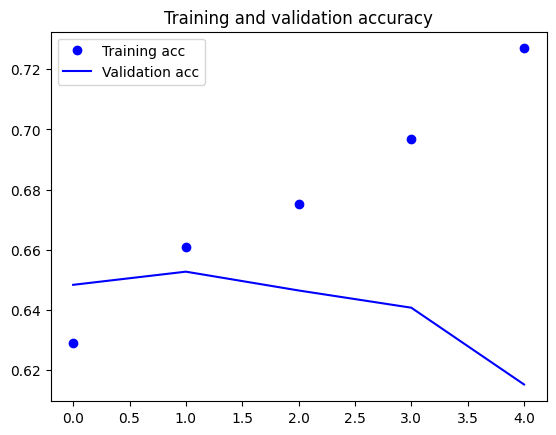

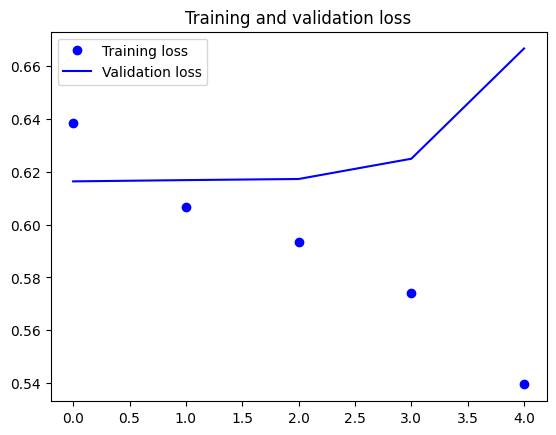

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:

model_conv.save("gdata/cnnrnncomb.h5")
model_conv.evaluate(x_test, y_test)

375/375 [==============================] - 2s 4ms/step - loss: 0.6707 - acc: 0.6157


[0.6706724166870117, 0.6156666874885559]

In [54]:

#Using bidirectional RNN's
from keras import backend as K
K.clear_session()

In [55]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,543,425
Trainable params: 1,543,425
Non-trainable params: 0
_________________________________________________________________


In [56]:

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
300/300 [==============================] - 18s 43ms/step - loss: 0.6571 - acc: 0.6161 - val_loss: 0.6334 - val_acc: 0.6225
Epoch 2/5
300/300 [==============================] - 9s 29ms/step - loss: 0.6253 - acc: 0.6423 - val_loss: 0.6222 - val_acc: 0.6461
Epoch 3/5
300/300 [==============================] - 8s 28ms/step - loss: 0.6146 - acc: 0.6519 - val_loss: 0.6224 - val_acc: 0.6447
Epoch 4/5
300/300 [==============================] - 8s 27ms/step - loss: 0.6089 - acc: 0.6594 - val_loss: 0.6223 - val_acc: 0.6330
Epoch 5/5
300/300 [==============================] - 8s 28ms/step - loss: 0.6044 - acc: 0.6647 - val_loss: 0.6159 - val_acc: 0.6521


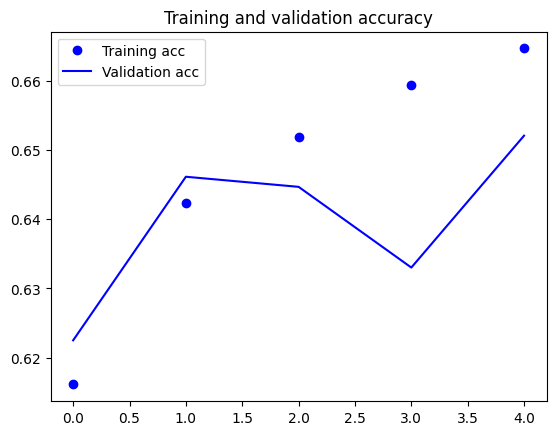

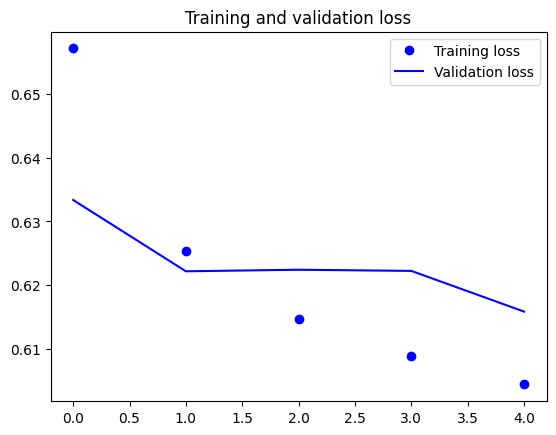

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
     

In [58]:

model.evaluate(x_test, y_test)

375/375 [==============================] - 4s 8ms/step - loss: 0.6251 - acc: 0.6437


[0.6251001954078674, 0.643666684627533]